In [1]:
from TextFileTransformer import TextFileTransformer

In [2]:
file_path = 'Data/response1.txt'  # Replace with the actual file path
text_transformer = TextFileTransformer(file_path)

# Transform the file
df_result = text_transformer.transform(None)

1. Reading File into Dataframe
2. Calculating pairwise Bert Metrics
Calculate bert score wrt seed prompt
3. Calculating Perplexity Score Metrics
4. Calculating aspect based Sentiments Metrics
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


2023-12-06 16:12:52,145 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


   Topic  Count
1      0     13
0      1      8


In [3]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [15]:
df_result.columns.values.tolist()

['Character',
 'Dialogue',
 'F1_Score',
 'F1_Score_Seed',
 'Perplexity',
 'SentimentScores',
 'TopSentimentScores']

In [62]:
df1=df_result[df_result['Character']=="Agent2"][['TopSentimentScores']]

KeyError: 1

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_sentiment_heatmap(df):
    # Extract topics, sentiment types, and sentiment scores from the "SentimentScore" column
    sentiment_data = []
    for index, row in df.iterrows():
        sentiment_data.extend([(index, topic, sentiment[0], sentiment[1]) for topic, sentiment in row['TopSentimentScores'].items()])

    # Create a DataFrame from the extracted data
    sentiment_df = pd.DataFrame(sentiment_data, columns=['Time/Index', 'Topic', 'SentimentType', 'SentimentScore'])

    # Create a heatmap using seaborn with custom color maps
    plt.figure(figsize=(12, 8))
    
    # Create the heatmap
    sns.heatmap(data=sentiment_df.pivot_table(index=['Time/Index'], columns='Topic', values='SentimentScore'),
                cmap="coolwarm",
                annot=True,
                fmt=".2f",
                linewidths=.5,
                cbar_kws={'label': 'Sentiment Score'},
                )
    
    # Create a separate color bar for SentimentType
    legend_labels = sentiment_df['SentimentType'].unique()
    colors = sns.color_palette("coolwarm", n_colors=len(legend_labels))
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[i], markersize=10) for i, label in enumerate(legend_labels)]
    
    plt.legend(handles=handles, title='Sentiment Type', loc='upper right')
    
    plt.title('Historical Sentiment Heatmap')
    plt.xlabel('Topics')
    plt.ylabel('Time/Index')
    plt.show()

# Example usage:
# create_sentiment_heatmap(your_dataframe)


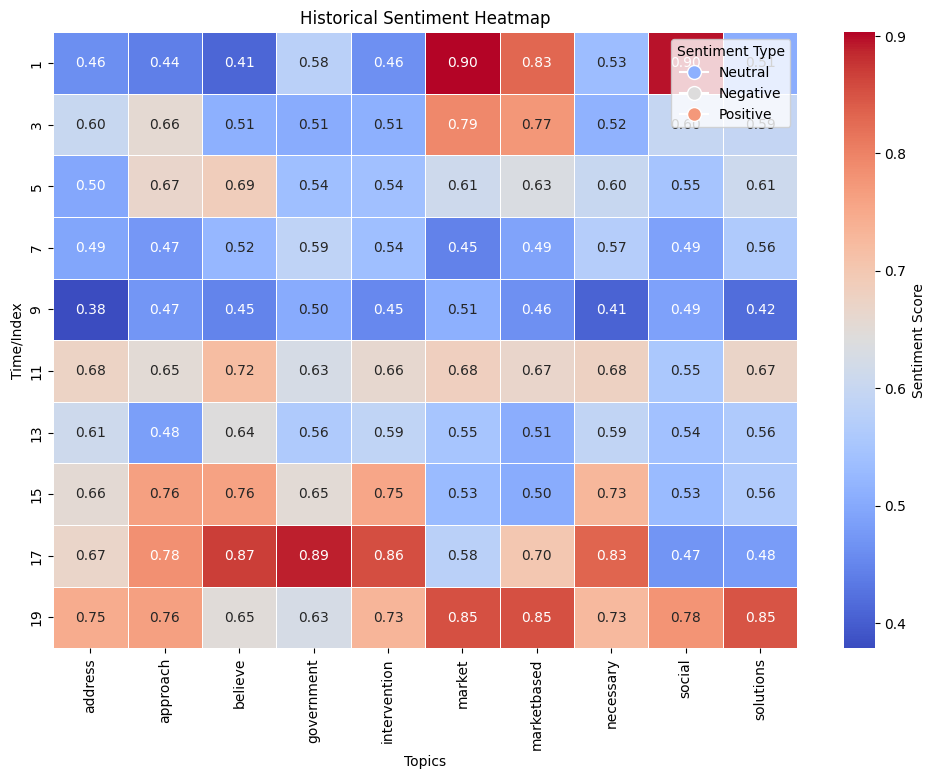

In [43]:
create_sentiment_heatmap(df1)

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_sentiment_heatmap(df):
    # Assuming your DataFrame has a column named 'TopSentimentScores'
    #df['TopSentimentScores'] = df['TopSentimentScores'].apply(eval)
    
    # Create a new DataFrame with columns 'Index', 'Topic', 'SentimentType', and 'SentimentScore'
    data = []
    for index, row in df.iterrows():
        for topic, (sentiment_type, sentiment_score) in row['TopSentimentScores'].items():
            data.append([index, topic, sentiment_type, sentiment_score])

    columns = ['Index', 'Topic', 'SentimentType', 'SentimentScore']
    new_df = pd.DataFrame(data, columns=columns)
    sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Apply the transformations
    new_df['SentimentScore'] = new_df.apply(lambda row: row['SentimentScore'] + sentiment_mapping[row['SentimentType']] if row['SentimentType'] == 'Positive' else row['SentimentScore'], axis=1)
    print(new_df)

    # Pivot the DataFrame to create a matrix for the heatmap
    heatmap_data = new_df.pivot(index='Index', columns='Topic', values='SentimentType')

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data.replace({'Positive': 1, 'Neutral': 0, 'Negative': -1}),
                cmap="coolwarm", annot=False, cbar_kws={'label': ' SentimentType'},linewidths=0.01)
    plt.title('Sentiment Heatmap')
    plt.show()

# Example usage with your DataFrame
# create_sentiment_heatmap(your_dataframe)


In [70]:
create_sentiment_heatmap(df1)

KeyError: 'SentimentType'